## Titanic Survival Analysis

In [780]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Load Dataset into Python?

In [782]:
dataframe = pd.read_csv('Titanic.csv')
df = dataframe.copy()

### 2.Display first 6 rows and last 6 rows of the dataset?

In [784]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [785]:
df.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


### 3.Display the shape of the dataset?

In [787]:
df.shape

(891, 12)

### 4.Display all column names?

In [789]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Rename Column Names as Required

In [791]:
df.rename(columns={'Pclass': 'Passenger Class', 'SibSp': 'Siblings/Spouses'}, inplace=True)
df.rename(columns={'Parch': 'Parents/Children'}, inplace=True)

### 5.Display the type of each column?

In [793]:
df.dtypes

PassengerId           int64
Survived              int64
Passenger Class       int64
Name                 object
Sex                  object
Age                 float64
Siblings/Spouses      int64
Parents/Children      int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
dtype: object

### 6.Print the information and summary?

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Passenger Class   891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   Siblings/Spouses  891 non-null    int64  
 7   Parents/Children  891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [796]:
df.describe()

,PassengerId,Survived,Passenger Class,Age,Siblings/Spouses,Parents/Children,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 7.Find Null Values?

In [798]:
df.isnull().sum()

PassengerId           0
Survived              0
Passenger Class       0
Name                  0
Sex                   0
Age                 177
Siblings/Spouses      0
Parents/Children      0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
dtype: int64

### 8.Replace Null values with the Mean, Median, Mode Values or Unknown?

In [800]:
# Replace null values in 'Age' column with the 'median value'
df['Age'] = df['Age'].fillna(df['Age'].median())

In [801]:
# Replace null values in 'Cabin' column with the 'Unknown'
df['Cabin']=df['Cabin'].fillna('Unknown')

In [802]:
# Replace null values in 'Embarked' column with the 'Mode Value'
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [803]:
df.isnull().sum()

PassengerId         0
Survived            0
Passenger Class     0
Name                0
Sex                 0
Age                 0
Siblings/Spouses    0
Parents/Children    0
Ticket              0
Fare                0
Cabin               0
Embarked            0
dtype: int64

### 9.Count of Survived vs UnSurvived and display using piechart?

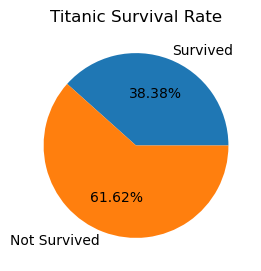

In [805]:
Survival_Count = df.Survived.value_counts().loc[[1,0]]
plt.figure(figsize=(5, 3))  # Set the figure size
plt.pie(Survival_Count, labels=[ 'Survived', 'Not Survived'],  autopct='%1.2f%%')
plt.title('Titanic Survival Rate')
plt.show()



### 10.Cross check the Survival Percent Manually

In [807]:
survival_rate = (df['Survived'].value_counts()[1] / len(df)) * 100
print(f"Survival rate: {survival_rate:.2f}%")

Survival rate: 38.38%


### 11.Count of Female passengers travelled in the first class, and display using piechart?

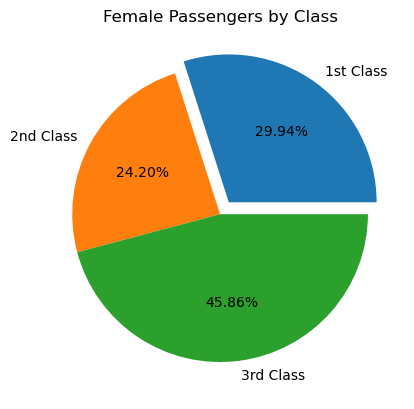

Count of female passengers in first class: 94
Count of female passengers in second class: 76
Count of female passengers in third class: 144


In [809]:
# Filter female passengers by class
female_first_class = df[(df['Sex'] == 'female') & (df['Passenger Class'] == 1)]
female_second_class = df[(df['Sex'] == 'female') & (df['Passenger Class'] == 2)]
female_third_class = df[(df['Sex'] == 'female') & (df['Passenger Class'] == 3)]

# Count female passengers by class
count_first_class = len(female_first_class)
count_second_class = len(female_second_class)
count_third_class = len(female_third_class)
# Create a pie chart
labels = ['1st Class', '2nd Class', '3rd Class']
sizes = [count_first_class, count_second_class, count_third_class]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
explode = [0.1, 0, 0]  # explode the first class slice

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.2f%%')
plt.title('Female Passengers by Class')
plt.show()

print(f"Count of female passengers in first class: {count_first_class}")
print(f"Count of female passengers in second class: {count_second_class}")
print(f"Count of female passengers in third class: {count_third_class}")

### 12.Find out number of male survived with age>40 and display using pie chart?

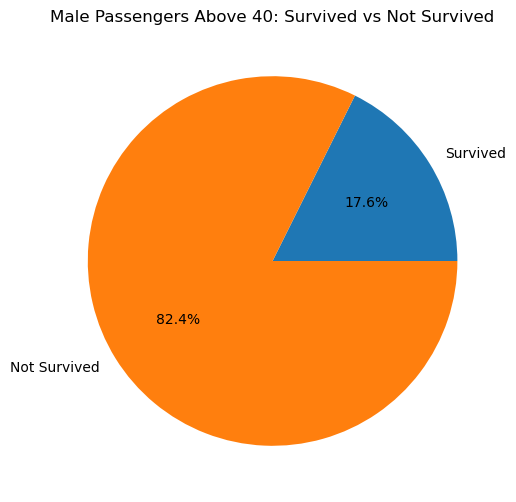

Male passengers above 40 who survived: 18
Male passengers above 40 who did not survive: 84


In [811]:
# Calculate counts
male_survived_above40 = df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] > 40)]
count_survived_above40 = len(male_survived_above40)

male_not_survived_above40 = df[(df['Sex'] == 'male') & (df['Survived'] == 0) & (df['Age'] > 40)]
count_not_survived_above40 = len(male_not_survived_above40)

# Create a pie chart
labels = ['Survived', 'Not Survived']
sizes = [count_survived_above40, count_not_survived_above40]
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Male Passengers Above 40: Survived vs Not Survived')
plt.show()

print(f"Male passengers above 40 who survived: {count_survived_above40}")
print(f"Male passengers above 40 who did not survive: {count_not_survived_above40}")




### 13.Find out number of female survived with age<30 and display using pie chart and bar graph?

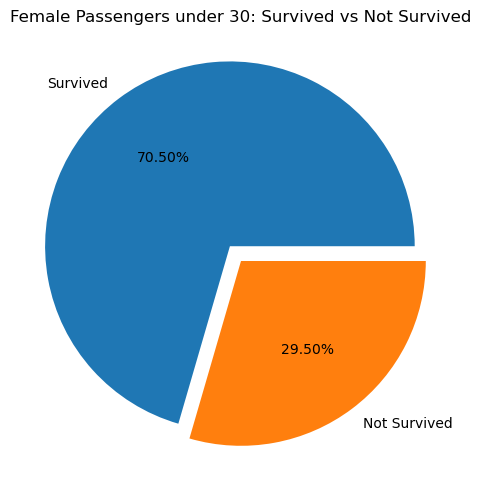

Female passengers under 30 who survived: 141
Female passengers under 30 who did not survive: 59


In [813]:
# Calculate counts
female_survived_below30 = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] < 30)]
count_survived_below30 = len(female_survived_below30)

female_not_survived_below30 = df[(df['Sex'] == 'female') & (df['Survived'] == 0) & (df['Age'] < 30)]
count_not_survived_below30 = len(female_not_survived_below30)

# Create a pie chart
labels = ['Survived', 'Not Survived']
sizes = [count_survived_below30, count_not_survived_below30]
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', explode=(0.1,0))
plt.title('Female Passengers under 30: Survived vs Not Survived')
plt.show()

print(f"Female passengers under 30 who survived: {count_survived_below30}")
print(f"Female passengers under 30 who did not survive: {count_not_survived_below30}")


### Male vs Female Sruvivals

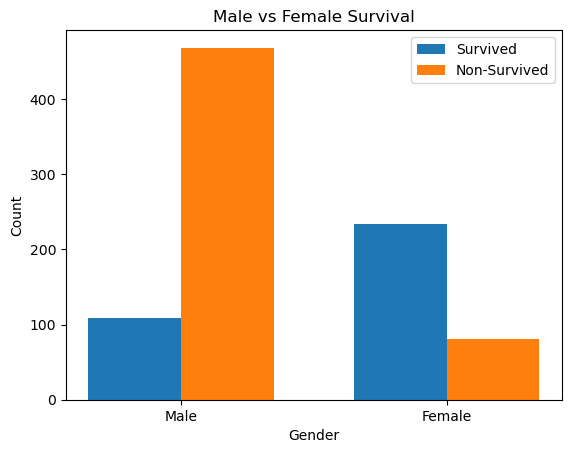

In [815]:
# Filter survivors by sex
male_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]

# Filter non-survivors by sex
male_non_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]
female_non_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]

# Count survivors and non-survivors by sex
male_survived_count = len(male_survivors)
female_survived_count = len(female_survivors)
male_non_survived_count = len(male_non_survivors)
female_non_survived_count = len(female_non_survivors)

# Create a bar chart
labels = ['Male', 'Female']
survived_sizes = [male_survived_count, female_survived_count]
non_survived_sizes = [male_non_survived_count, female_non_survived_count]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived_sizes, width, label='Survived')
rects2 = ax.bar(x + width/2, non_survived_sizes, width, label='Non-Survived')

ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.set_title('Male vs Female Survival')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

#### NOTE: Significant Number of Female Passengers got survived compared to Male Passengers

### 15. Show age with Bins

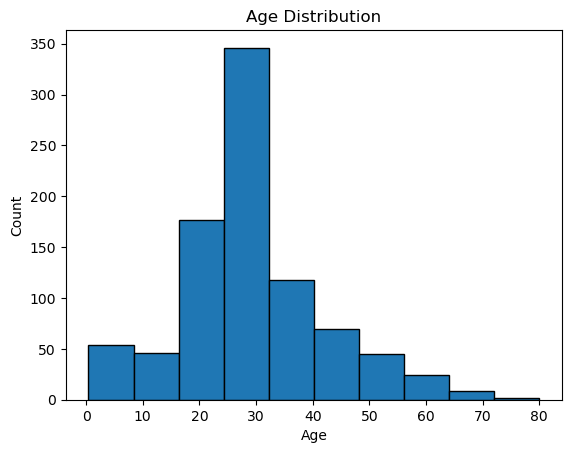

In [818]:
# Create a histogram of ages with 20 bins
plt.hist(df['Age'].dropna(), bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### NOTE: A significant proportion of passengers (approximately >50%) fall within the age range of 20-40 years.

### 16.Show age frequency with survived and not survived using histogram?

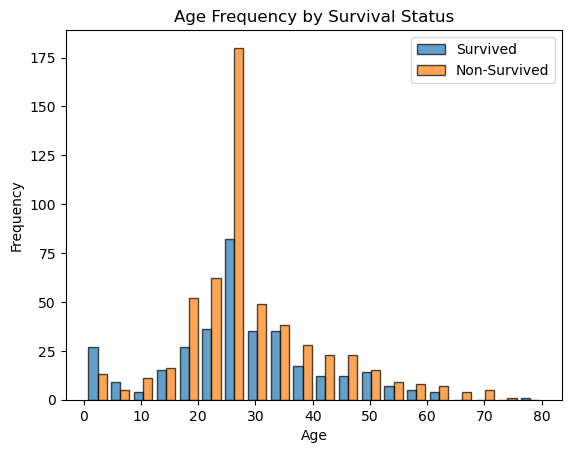

In [821]:
# Create a histogram of age frequencies for survived and non-survived passengers
plt.hist([df[df['Survived'] == 1]['Age'], df[df['Survived'] == 0]['Age']], 
         bins=20, label=['Survived', 'Non-Survived'], alpha=0.7, edgecolor='black')
plt.title('Age Frequency by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

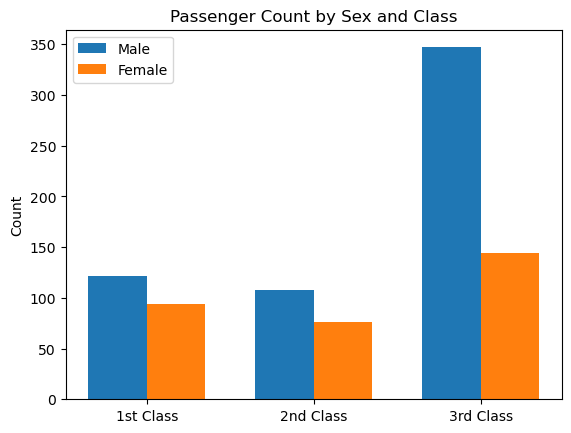

In [822]:
 #Create a bar graph of passenger counts by sex and class
male_first_class = len(df[(df['Sex'] == 'male') & (df['Passenger Class'] == 1)])
male_second_class = len(df[(df['Sex'] == 'male') & (df['Passenger Class'] == 2)])
male_third_class = len(df[(df['Sex'] == 'male') & (df['Passenger Class'] == 3)])

female_first_class = len(df[(df['Sex'] == 'female') & (df['Passenger Class'] == 1)])
female_second_class = len(df[(df['Sex'] == 'female') & (df['Passenger Class'] == 2)])
female_third_class = len(df[(df['Sex'] == 'female') & (df['Passenger Class'] == 3)])

labels = ['1st Class', '2nd Class', '3rd Class']
male_sizes = [male_first_class, male_second_class, male_third_class]
female_sizes = [female_first_class, female_second_class, female_third_class]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_sizes, width, label='Male')
rects2 = ax.bar(x + width/2, female_sizes, width, label='Female')

ax.set_ylabel('Count')
ax.set_title('Passenger Count by Sex and Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

#### NOTE: Interestingly, more than 50% of passengers opted for 3rd Class, indicating a significant proportion of budget-conscious travelers.

### 17.How many passengesr travelled from different classes (bar graph)?

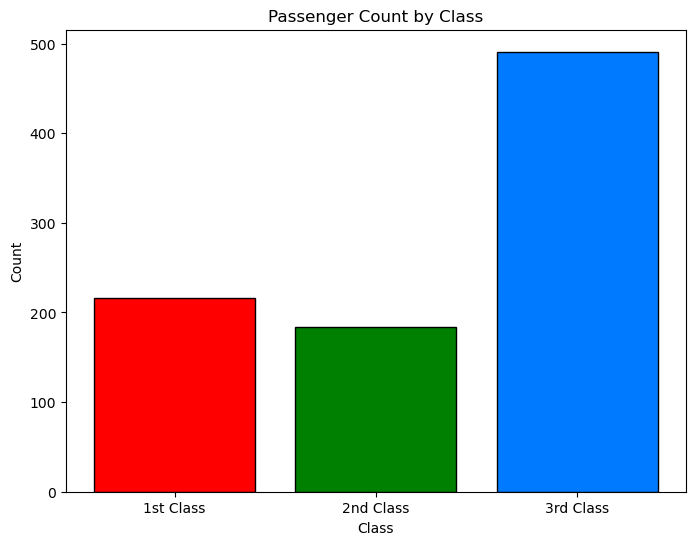

In [825]:
# Create a bar graph of passenger count by class
class_counts = df['Passenger Class'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(class_counts.index, class_counts.values, 
        edgecolor='black', color=['#007bff', '#ff0000', '#008000'])
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.show()



#### 3rd Class is the most chosen among all three 

### 18.Passengers survived class wise bar chart?

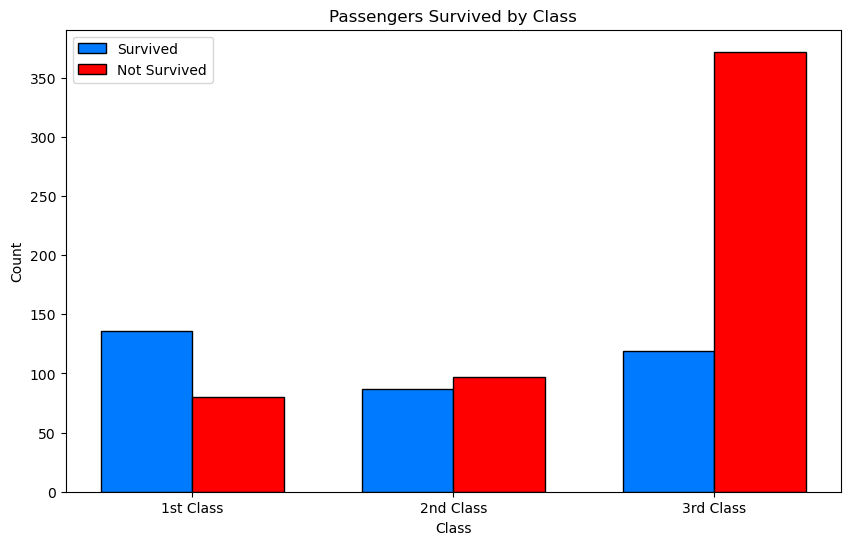

In [828]:
# Create a bar graph of passengers survived by class
survived_class_counts = df[df['Survived'] == 1]['Passenger Class'].value_counts()
not_survived_class_counts = df[df['Survived'] == 0]['Passenger Class'].value_counts()

# Sort the data to ensure correct order
survived_class_counts = survived_class_counts.sort_index()
not_survived_class_counts = not_survived_class_counts.sort_index()

bar_width = 0.35
x = np.arange(3)

plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, survived_class_counts.values, bar_width, 
        edgecolor='black', label='Survived', color='#007bff')
plt.bar(x + bar_width/2, not_survived_class_counts.values, bar_width, 
        edgecolor='black', label='Not Survived', color='#ff0000')
plt.title('Passengers Survived by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(x, ['1st Class', '2nd Class', '3rd Class'])
plt.legend()
plt.show()

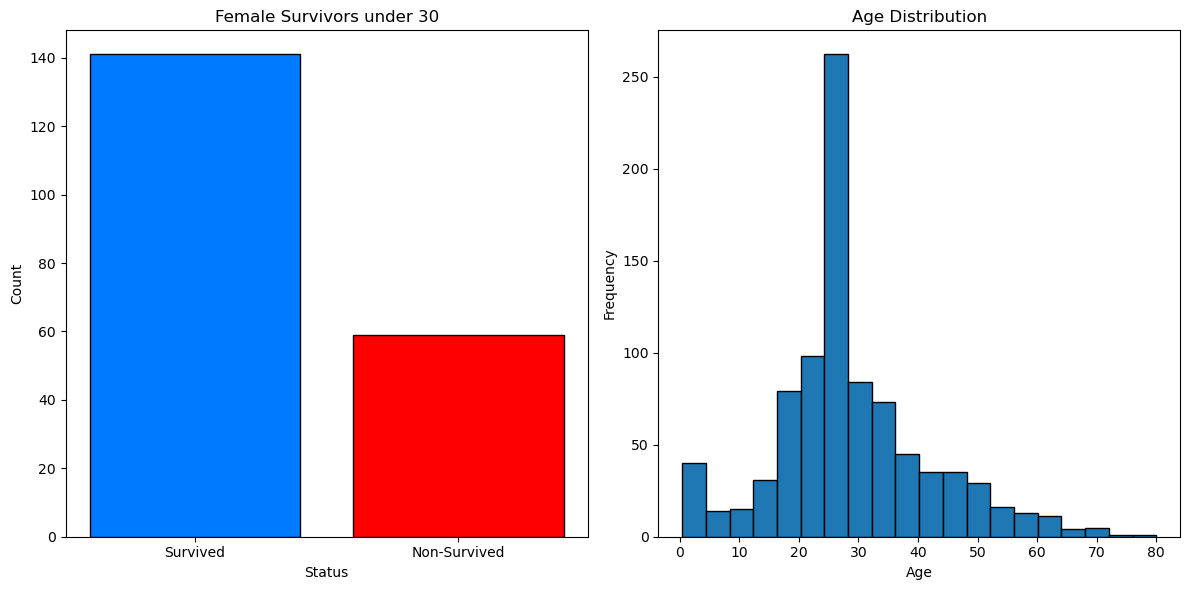

In [829]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot1: Female survivors under 30 (Bar Graph)
female_survivors_under_30 = df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] < 30)]
female_non_survivors_under_30 = df[(df['Sex'] == 'female') & (df['Survived'] == 0) & (df['Age'] < 30)]

axs[0].bar(['Survived', 'Non-Survived'], [len(female_survivors_under_30), len(female_non_survivors_under_30)], 
           edgecolor='black', color=['#007bff', '#ff0000'])
axs[0].set_title('Female Survivors under 30')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Count')

# Plot2: Age distribution (Histogram)
axs[1].hist(df['Age'].dropna(), bins=20, edgecolor='black')
axs[1].set_title('Age Distribution')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [830]:
df.head()

,PassengerId,Survived,Passenger Class,Name,Sex,Age,Siblings/Spouses,Parents/Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


### Drop Unwanted Columns and Map the Male value to 1 and female value to 0

In [878]:
# Select specific columns from the original DataFrame and create a copy
cols = ["Survived", "Passenger Class", "Sex", "Siblings/Spouses", "Parents/Children", "Fare", "Embarked"]
final_df = df[cols].copy()

# Map the 'Sex' column to numerical values (0 for male, 1 for female)
final_df['Sex'] = final_df['Sex'].map({'male': 0, 'female': 1})


In [862]:
final_df

,Survived,Passenger Class,Sex,Siblings/Spouses,Parents/Children,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000,S
887,1,1,1,0,0,30.0000,S
888,0,3,1,1,2,23.4500,S
889,1,1,0,0,0,30.0000,C


## Conclusion of Titanic Data Analysis

#### The analysis of the Titanic dataset revealed key survival trends based on gender, age, and class. The majority of passengers were between the ages of 20 to 40 years, and over 55% of travelers belonged to the 3rd class, indicating that a significant portion of the passengers came from lower socio-economic backgrounds.

#### The overall survival rate was 38.38%, with women having a significantly higher survival rate than men, reinforcing the "women and children first" evacuation policy. Additionally, passengers from the 1st class had the highest survival rate, likely due to better access to lifeboats and priority rescue efforts.

#### These findings highlight the impact of social class and gender on survival probabilities, demonstrating how certain groups had a greater advantage during the disaster. This analysis serves as a valuable case study in understanding the influence of socio-economic factors in crisis situations. 